In [4]:
import pandas as pd

df = pd.read_csv('Housing.csv')

print(df.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [1]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 927.5 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.7 MB 942.4 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/8.7 MB 982.1 kB/s eta 0:00:08
   ---- ----------------------------------- 1.0/8.7 MB 982.1 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.7 MB 874.9 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.7 MB 968.7 kB/s eta 0:00:08
   -------- ------------------------------- 1.8/8.7 MB 1.0 MB/s eta 0:00:07
   --------- -----------------------------

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(model, X, y, label="Dataset"):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{label} -> MSE: {mse:.2f}, R2: {r2:.2f}")
    return y_pred

In [18]:
y_train_pred = evaluate_model(model, X_train, y_train, "Train")
y_val_pred   = evaluate_model(model, X_val, y_val, "Validation")
y_test_pred  = evaluate_model(model, X_test, y_test, "Test")

Train -> MSE: 977287576920.87, R2: 0.69
Validation -> MSE: 1725712683071.02, R2: 0.60
Test -> MSE: 1214267076347.84, R2: 0.72


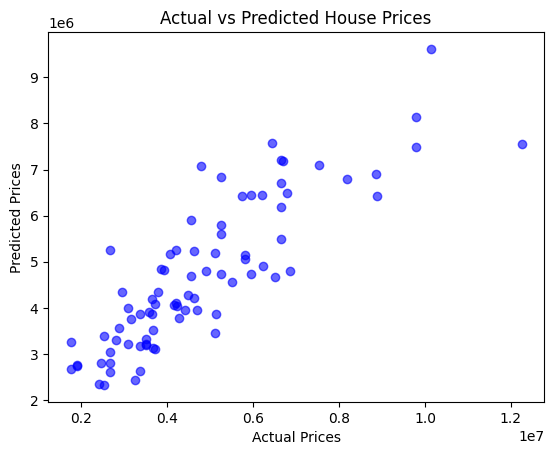

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()